# Coursera Capstone
this notebook will be mainly used for the capstone project.

In [44]:
import numpy as np
import pandas as pd

In [45]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [47]:
df = pd.read_csv('../input/datacollisions/Data-Collisions.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [49]:
df_use = df[['SEVERITYCODE', 'ADDRTYPE', 'ROADCOND', 'LIGHTCOND', 'WEATHER']]
df_use.head()

,SEVERITYCODE,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER
0,2,Intersection,Wet,Daylight,Overcast
1,1,Block,Wet,Dark - Street Lights On,Raining
2,1,Block,Dry,Daylight,Overcast
3,1,Block,Dry,Daylight,Clear
4,2,Intersection,Wet,Daylight,Raining


In [50]:
index = df_use[df_use['ROADCOND']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['LIGHTCOND']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['WEATHER']=='Unknown'].index
df_use = df_use.drop(index=index)

index = df_use[df_use['ADDRTYPE']=='Unknown'].index
df_use = df_use.drop(index=index)

df_use = df_use.dropna()

del(index)

In [51]:
road_cond = df_use['ROADCOND'].unique()
light_cond = df_use['LIGHTCOND'].unique()
weather_cond = df_use['WEATHER'].unique()
addrType = df_use['ADDRTYPE'].unique()

print(road_cond, light_cond, weather_cond, addrType, sep='\n\n')

df_use = df_use[df_use['ROADCOND'].isin(road_cond)]
df_use = df_use[df_use['LIGHTCOND'].isin(light_cond)]
df_use = df_use[df_use['WEATHER'].isin(weather_cond)]
df_use = df_use[df_use['ADDRTYPE'].isin(addrType)]

['Wet' 'Dry' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt' 'Standing Water'
 'Oil']

['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Dusk'
 'Dawn' 'Dark - Street Lights Off' 'Other' 'Dark - Unknown Lighting']

['Overcast' 'Raining' 'Clear' 'Snowing' 'Other' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']

['Intersection' 'Block' 'Alley']


In [52]:
df_use

,SEVERITYCODE,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER
0,2,Intersection,Wet,Daylight,Overcast
1,1,Block,Wet,Dark - Street Lights On,Raining
2,1,Block,Dry,Daylight,Overcast
3,1,Block,Dry,Daylight,Clear
4,2,Intersection,Wet,Daylight,Raining
...,...,...,...,...,...
194668,2,Block,Dry,Daylight,Clear
194669,1,Block,Wet,Daylight,Raining
194670,2,Intersection,Dry,Daylight,Clear
194671,2,Intersection,Dry,Dusk,Clear


In [53]:
df_use['addr_cat'] = en.fit_transform(df_use['WEATHER'])
df_use['road_cat'] = en.fit_transform(df_use['ROADCOND'])
df_use['light_cat'] = en.fit_transform(df_use['LIGHTCOND'])
df_use['weather_cat'] = en.fit_transform(df_use['WEATHER'])

df_use

,SEVERITYCODE,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER,addr_cat,road_cat,light_cat,weather_cat
0,2,Intersection,Wet,Daylight,Overcast,4,7,5,4
1,1,Block,Wet,Dark - Street Lights On,Raining,6,7,2,6
2,1,Block,Dry,Daylight,Overcast,4,0,5,4
3,1,Block,Dry,Daylight,Clear,1,0,5,1
4,2,Intersection,Wet,Daylight,Raining,6,7,5,6
...,...,...,...,...,...,...,...,...,...
194668,2,Block,Dry,Daylight,Clear,1,0,5,1
194669,1,Block,Wet,Daylight,Raining,6,7,5,6
194670,2,Intersection,Dry,Daylight,Clear,1,0,5,1
194671,2,Intersection,Dry,Dusk,Clear,1,0,6,1


In [54]:
data = df_use[['SEVERITYCODE', 'addr_cat', 'road_cat', 'light_cat', 'weather_cat']]
data.iloc[:,1:] = data.iloc[:,1:] +1

data.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SEVERITYCODE,addr_cat,road_cat,light_cat,weather_cat
0,2,5,8,6,5
1,1,7,8,3,7
2,1,5,1,6,5
3,1,2,1,6,2
4,2,7,8,6,7


In [55]:
data.dtypes

SEVERITYCODE    int64
addr_cat        int64
road_cat        int64
light_cat       int64
weather_cat     int64
dtype: object

In [56]:
data.corr()

,SEVERITYCODE,addr_cat,road_cat,light_cat,weather_cat
SEVERITYCODE,1.000000,0.002429,0.007310,0.035432,0.002429
addr_cat,0.002429,1.000000,0.799974,-0.142487,1.000000
road_cat,0.007310,0.799974,1.000000,-0.157293,0.799974
light_cat,0.035432,-0.142487,-0.157293,1.000000,-0.142487
weather_cat,0.002429,1.000000,0.799974,-0.142487,1.000000


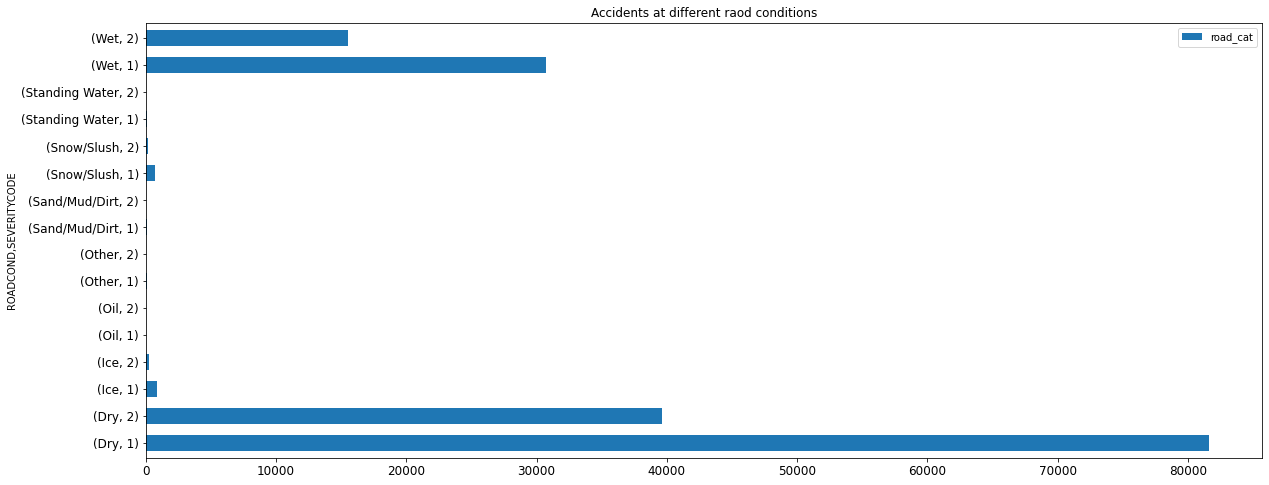

In [57]:
newData = df_use[['ROADCOND', 'SEVERITYCODE','road_cat']]
data_grp = newData.groupby(['ROADCOND', 'SEVERITYCODE']).count()
data_grp.plot(kind='barh', figsize=(20,8), title='Accidents at different raod conditions', fontsize=12 ,width=0.6)

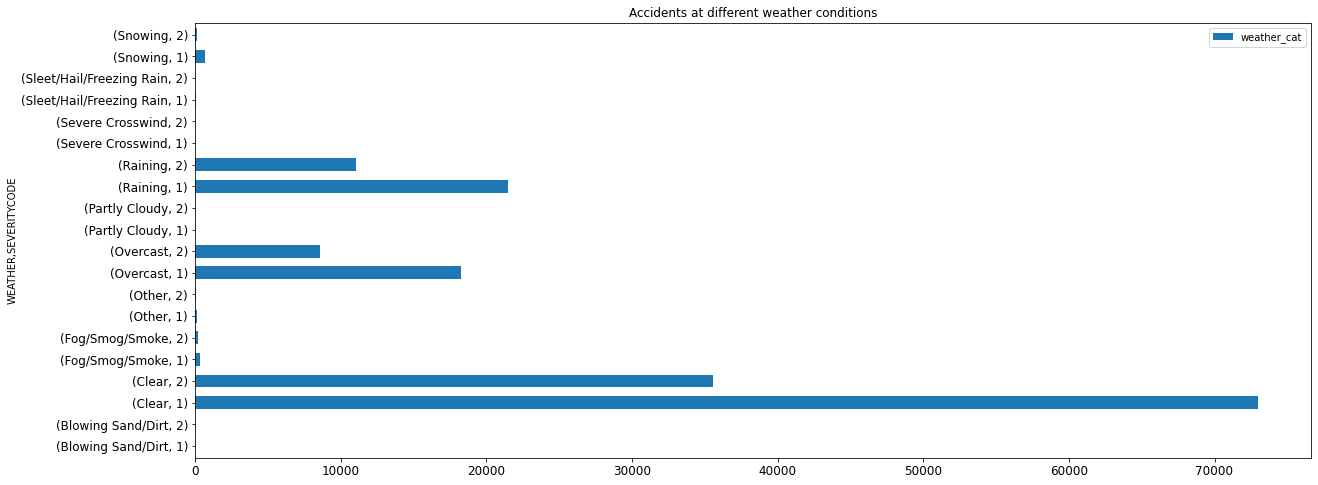

In [58]:
newData = df_use[['WEATHER', 'SEVERITYCODE','weather_cat']]
data_grp = newData.groupby(['WEATHER', 'SEVERITYCODE']).count()
data_grp.plot(kind='barh', figsize=(20,8), title='Accidents at different weather conditions', fontsize=12 ,width=0.6)

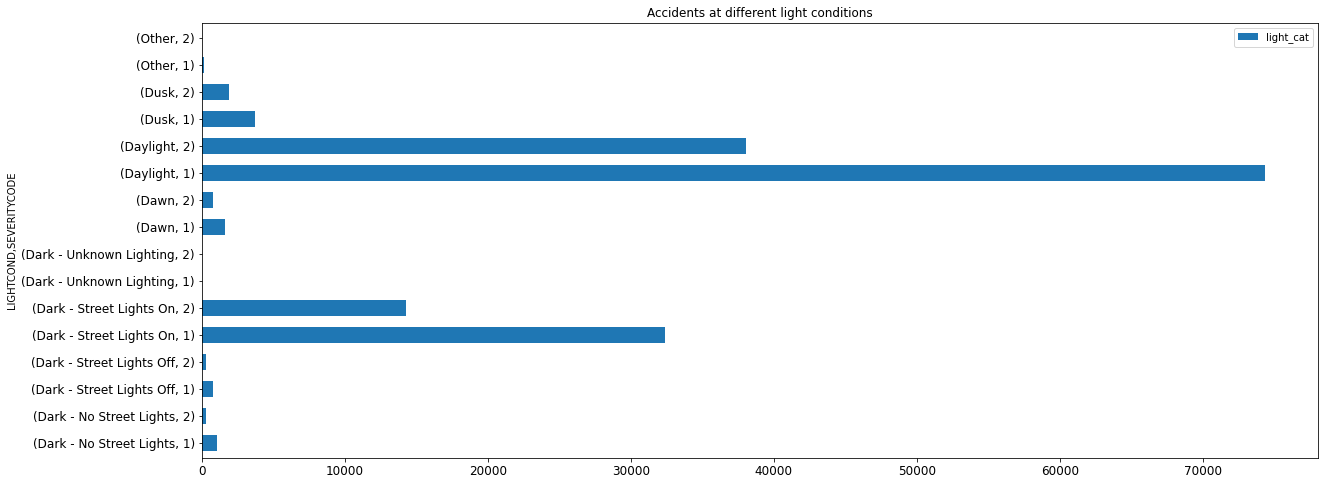

In [59]:
newData = df_use[['LIGHTCOND', 'SEVERITYCODE','light_cat']]
data_grp = newData.groupby(['LIGHTCOND', 'SEVERITYCODE']).count()
data_grp.plot(kind='barh', figsize=(20,8), title='Accidents at different light conditions', fontsize=12,width=0.6)

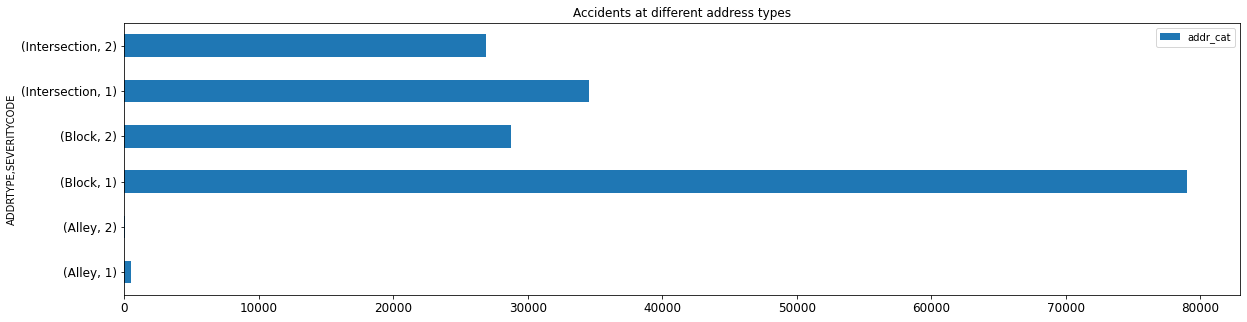

In [60]:
newData = df_use[['ADDRTYPE', 'SEVERITYCODE','addr_cat']]
data_grp = newData.groupby(['ADDRTYPE', 'SEVERITYCODE']).count()
data_grp.plot(kind='barh', figsize=(20,5), title='Accidents at different address types', fontsize=12)

In [61]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR

from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, log_loss, jaccard_score, f1_score

In [62]:
X, Y = data[['addr_cat','road_cat','light_cat','weather_cat']], data['SEVERITYCODE']

In [63]:
X.head()

,addr_cat,road_cat,light_cat,weather_cat
0,5,8,6,5
1,7,8,3,7
2,5,1,6,5
3,2,1,6,2
4,7,8,6,7


In [64]:
Y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [65]:
X.describe()

,addr_cat,road_cat,light_cat,weather_cat
count,169781.000000,169781.000000,169781.000000,169781.000000
mean,3.485160,2.947226,5.128566,3.485160
std,2.092171,3.119565,1.442011,2.092171
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000
50%,2.000000,1.000000,6.000000,2.000000
75%,5.000000,8.000000,6.000000,5.000000
max,10.000000,8.000000,8.000000,10.000000


In [66]:
Y.describe()

count    169781.000000
mean          1.328111
std           0.469527
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: SEVERITYCODE, dtype: float64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)

In [68]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(144313, 4) (25468, 4) (144313,) (25468,)


# Decision Tree Classifier

In [69]:
Dtree = DTC(splitter='best', min_samples_split=3)
# scores = 
Dtree.fit(x_train, y_train)

ypre = Dtree.predict(x_test)

In [70]:
DecTree = {}

DecTree['F1-Score'] = f1_score(ypre, y_test)
DecTree['accuracy_score'] = accuracy_score(ypre, y_test)
DecTree['jaccard_score'] = jaccard_score(ypre, y_test)

print(ypre[:10], y_test[:10].values.reshape(1,-1),DecTree, sep='\n')

[1 1 1 1 1 1 1 1 1 1]
[[1 1 1 1 2 1 2 1 1 2]]
{'F1-Score': 0.8026897394902661, 'accuracy_score': 0.6704884561017748, 'jaccard_score': 0.6704108082632944}


# K Neighbours Classifier

scores = []
for k in range(3, 50):
    KNeigh = KNN(n_neighbors=k)
    KNeigh.fit(x_train, y_train)

    ypre = KNeigh.predict(x_test)
    acc = accuracy_score(ypre, y_test)
    print(k,' : ',acc,end='\t')
    scores.append(acc)
    
print(max(scores))

out : 22

### after realizing that 22 is the point were the max accuracy is found
note changed this cell to markdown cause it takes lot of time to execute almost more than a hour

In [71]:
KNeighBest = KNN(n_neighbors = 22)
KNeighBest.fit(x_train, y_train)

ypre = KNeighBest.predict(x_test)

In [72]:
KNeighScores = {}

KNeighScores['F1-Score'] = f1_score(ypre, y_test)
KNeighScores['accuracy_score'] = accuracy_score(ypre, y_test)
KNeighScores['jaccard_score'] = jaccard_score(ypre, y_test)

KNeighScores

{'F1-Score': 0.8020524408040295,
 'accuracy_score': 0.6697816868226795,
 'jaccard_score': 0.6695221628418736}

# Logistic Regression

In [73]:
LReg = LR()
LReg.fit(x_train, y_train)

ypre = LReg.predict(x_test)
ypre_proba = LReg.predict_proba(x_test)

In [74]:
LRegScores = {}

LRegScores['F1-Score'] = f1_score(ypre, y_test)
LRegScores['accuracy_score'] = accuracy_score(ypre, y_test)
LRegScores['jaccard_score'] = jaccard_score(ypre, y_test)
LRegScores['Logg_loss'] = log_loss(y_test, ypre_proba)

LRegScores

{'F1-Score': 0.8028016734828186,
 'accuracy_score': 0.6705669860216743,
 'jaccard_score': 0.6705669860216743,
 'Logg_loss': 0.6327437048864725}

# Conclusion


### The Report
final comparision of scores

In [79]:
result = pd.DataFrame(data=[LRegScores, DecTree, KNeighScores])

result.index =  ['Logistic Regeression', 'Decision Tree', 'K-NeighScores (22)']

result

,F1-Score,accuracy_score,jaccard_score,Logg_loss
Logistic Regeression,0.802802,0.670567,0.670567,0.632744
Decision Tree,0.802690,0.670488,0.670411,NaN
K-NeighScores (22),0.802052,0.669782,0.669522,NaN


since the logistic regression is little bit better than the other classifiers with the f1_score and accuracy score.
For the given model Logistic Regression is best classifier choice for the given dataset.